## Evolving MF considering mass-dependent mass loss probability

$\Phi(m,t)=dn/dm$ is the mass function of stars that changes over time, $p(m)$ is the probability a star with mass $m$ get ejected, then we have

$$
\frac{d\Phi(m,t)}{dt} = \frac{p(m)\Phi(m,t)}{\int_0^{\infty}p(m)\Phi(m,t)dm}\dot{N}
$$

where $N$ is the total number of stars still in the cluster at the moment. Based on this, we have

$$
\frac{d\Phi(m,t)}{dN} = \frac{p(m)\Phi(m,t)}{\int_0^{\infty}p(m)\Phi(m,t)dm}
$$

So, $\Phi$ can be written as a function of just $m$ and $N$. It does not depend on the actual shape of $N(t)$, i.e., the mass loss history. We can re-write the euqation as

$$
\frac{d\Phi(m,N)}{dN} = \frac{p(m)\Phi(m,N)}{\int_0^{\infty}p(m)\Phi(m,N)dm}
$$

It is not easy to solve this analytically. I provide here a notebook to numerically solve this equation, assuming $N_0=10^6$, $\Phi(m, N_0)\propto m^{-2.35}$, and $p(m)\propto m^{-1/2}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

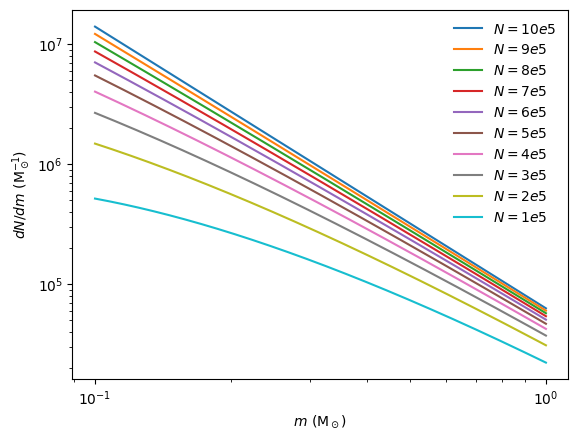

In [2]:
N0 = 1e6

dx = 0.001
x = np.arange(0.1,1,dx)
p = x**-0.5

y0 = x**-2.35
y0 = y0 * N0 / (np.sum(y0)*dx)

y = np.copy(y0)
N = np.copy(N0)

dN = -1000
for i, N in enumerate(np.arange(N0, 0, dN)):
    if N % 1e5 == 0:
        plt.plot(x, y, label=r'$N = %de5$'%(N/1e5))
        # print('%g'%(np.sum(y)*dx))

    dy = dN * p * y / np.sum(p * y) / dx
    # print(y)
    y += dy
    N += dN
    
plt.legend(frameon=False)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m\ ({\rm M_\odot})$')
plt.ylabel(r'$dN/dm\ ({\rm M_\odot^{-1}})$')

plt.show()